<a href="https://colab.research.google.com/github/steve-keys/Assignment---1--Intro-to-Programming/blob/main/Copy_of_WorkPad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring URL building and showing results

## EXPLORED PAGE SCRAPPING TO GET EXECUTIVES' NAMES, TITLE AND PAY

In [ ]:
def get_ticker():
  company_ticker = input("What is your Company's Stock Market Ticker Symbol? ")
  url = "https://au.finance.yahoo.com/quote/{}/profile?p={}".format(company_ticker,company_ticker)
  return url

In [ ]:
get_ticker()

What is your Company's Stock Market Ticker Symbol? NAB.AX


'https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX'

In [ ]:
# This will get me the page
url = get_ticker()
print(url)



What is your Company's Stock Market Ticker Symbol? NAB.AX
https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX


In [4]:
# Now I need to go get the page....
# Install Kora and load packages
!pip install kora -q

'''load packages'''
from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd

     |████████████████████████████████| 57 kB 1.9 MB/s 
     |████████████████████████████████| 56 kB 3.3 MB/s 


In [7]:
url = 'https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX'

In [8]:
# The following code will get the page for me using the url supplied in the "url = get_ticker" function above
wd.get(url)
soup = BeautifulSoup(wd.page_source, "html.parser")

In [ ]:
# I can view and check the soup if I want to..
soup

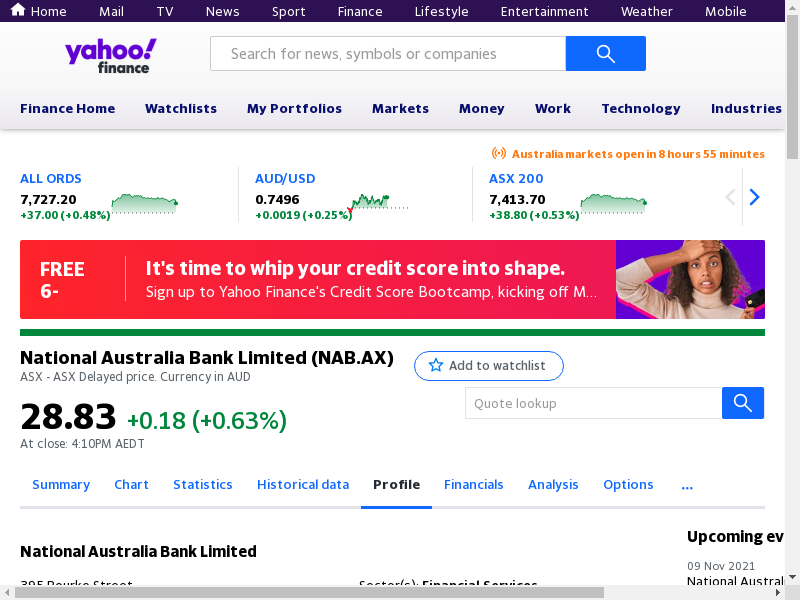

In [ ]:
# I can also check I have the correct web page using "wd" to take a screen shot...
wd

In [9]:
# I've looked at the page source and inspected the above table in it, and now want to see how many tables there are in total on the page...
table = soup.find_all('table')
len(table)

1

In [10]:
# As I can see now that there is only one table I can use the find command...
table = soup.find('table')
len(table)

2

In [11]:
# And now I just want to look at the table itself...
table = soup.find('table')
table

<table class="W(100%)" data-reactid="36"><thead data-reactid="37"><tr class="C($tertiaryColor) Fz(xs) BdB Bdc($seperatorColor)" data-reactid="38"><th class="Ta(start) Py(6px) Fw(n)" data-reactid="39"><span data-reactid="40">Name</span></th><th class="Ta(start) Py(6px) Fw(n)" data-reactid="41"><span data-reactid="42">Title</span></th><th class="Ta(end) Py(6px) Fw(n)" data-reactid="43"><span data-reactid="44">Pay</span></th><th class="Ta(end) Py(6px) Fw(n)" data-reactid="45"><span data-reactid="46">Exercised</span></th><th class="Ta(end) Py(6px) Fw(n)" data-reactid="47"><span data-reactid="48">Year born</span></th></tr></thead><tbody data-reactid="49"><tr class="C($primaryColor) BdB Bdc($seperatorColor) H(36px)" data-reactid="50"><td class="Ta(start)" data-reactid="51"><span class="" data-reactid="52"><!-- react-text: 53 -->Mr. Ross Maxwell McEwan CBE, B.B.S.<!-- /react-text --></span></td><td class="Ta(start) W(45%)" data-reactid="54"><span class="" data-reactid="55"><!-- react-text: 56

In [ ]:
# now I would like to check the body in the table, which from what I have seen when inspecting the page, contains the Executives' names, titles and pays which I need for processing the tax payable by each
table = soup.find('table')
body = table.find_all('tbody')
body

[<tbody data-reactid="49"><tr class="C($primaryColor) BdB Bdc($seperatorColor) H(36px)" data-reactid="50"><td class="Ta(start)" data-reactid="51"><span class="" data-reactid="52"><!-- react-text: 53 -->Mr. Ross Maxwell McEwan CBE, B.B.S.<!-- /react-text --></span></td><td class="Ta(start) W(45%)" data-reactid="54"><span class="" data-reactid="55"><!-- react-text: 56 -->Group CEO, MD &amp; Director<!-- /react-text --></span></td><td class="Ta(end)" data-reactid="57"><span class="" data-reactid="58"><!-- react-text: 59 -->2.54M<!-- /react-text --></span></td><td class="Ta(end)" data-reactid="60"><span class="" data-reactid="61"><span data-reactid="62">N/A</span></span></td><td class="Ta(end)" data-reactid="63"><span class="" data-reactid="64"><!-- react-text: 65 -->1957<!-- /react-text --></span></td></tr><tr class="C($primaryColor) BdB Bdc($seperatorColor) H(36px)" data-reactid="66"><td class="Ta(start)" data-reactid="67"><span class="" data-reactid="68"><!-- react-text: 69 -->Mr. Gary 

In [12]:
# now I want to find the number of individual rows within the table to check that I have captured them all in the table I'm after........
table = soup.find('table')
body = table.find('tbody')
rows = body.find_all('tr')
len(rows)
# ten is correct

10

In [13]:
# Exploring the rows ........
table = soup.find('table')
body = table.find('tbody')
rows = body.find_all('tr')
rows[0].text

'Mr. Ross Maxwell McEwan CBE, B.B.S.Group CEO, MD & Director2.54MN/A1957'

In [14]:
# To begin with I will just process one row to gain an understanding and process all rows later ...
row = rows[0]

In [16]:
# Checking the number of columns.....
cells = row.find_all('td')
len(cells)

# 5 collumns is correct...Name, Title, Pay,Exercised, Year born

5

In [17]:
# Exporing individual cells......
cells = row.find_all('td')
cells[0]

<td class="Ta(start)" data-reactid="51"><span class="" data-reactid="52"><!-- react-text: 53 -->Mr. Ross Maxwell McEwan CBE, B.B.S.<!-- /react-text --></span></td>

In [22]:
cells = row.find_all('td')
name = cells[0].text
title = cells[1].text
pay = cells[2].text
print(name)
print(title)
print(pay)

Mr. Ross Maxwell McEwan CBE, B.B.S.
Group CEO, MD & Director
2.54M


In [31]:
# Now I can create a function to extract these first three cells....
def get_name_title_pay(row):
  cells = row.find_all('td')
  name = cells[0].text
  title = cells[1].text
  pay = cells[2].text
  return {'name': name, 'title':title, 'pay': pay}


In [32]:
get_name_title_pay(rows[3])

{'name': 'Ms. Sharon J. Cook',
 'pay': '912.98k',
 'title': 'Group Exec. of Legal & Commercial Services'}

In [34]:
# now I need to capture all the rows...
for row in rows:
  result = get_name_title_pay(row)
  print(result)

{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}
{'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}
{'name': 'Mr. Patrick F. Wright', 'title': 'Group Exec. of Technology & Enterprise Operations', 'pay': '1.72M'}
{'name': 'Ms. Sharon J. Cook', 'title': 'Group Exec. of Legal & Commercial Services', 'pay': '912.98k'}
{'name': 'Ms. Susan  Ferrier', 'title': 'Group Exec. of People & Culture', 'pay': '929.27k'}
{'name': 'Ms. Angela  Mentis B.Bus', 'title': 'Group Chief Digital, Data & Analytics Officer', 'pay': '1.62M'}
{'name': 'Mr. Shaun  Dooley', 'title': 'Chief Risk Officer', 'pay': '1.05M'}
{'name': 'Mr. Andrew  Irvine', 'title': 'Chief Exec. of Bus. Private Banking Division', 'pay': '333.27k'}
{'name': 'Mr. Lesile D. Matheson', 'title': 'Group Chief Operating Officer', 'pay': 'N/A'}
{'name': 'Ms. Sally  Mihell', 'title': 'Head of Investor Relations', 'pay': 'N/A'}


In [36]:
exec_details = []
for row in rows:
  result = get_name_title_pay(row)
  exec_details.append(result)

  print(exec_details)

[{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}]
[{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}, {'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}]
[{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}, {'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}, {'name': 'Mr. Patrick F. Wright', 'title': 'Group Exec. of Technology & Enterprise Operations', 'pay': '1.72M'}]
[{'name': 'Mr. Ross Maxwell McEwan CBE, B.B.S.', 'title': 'Group CEO, MD & Director', 'pay': '2.54M'}, {'name': 'Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA', 'title': 'Group Chief Financial Officer', 'pay': '1.13M'}, {'name': 'Mr. Patrick F. Wright', 'title': 'Group Exec. of Technology & Enterprise Operations', 'pay': '1.